# EDA (Exploration Data Analysis) setelah data di Cleaning

## Setup dan Import Library

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual style
plt.style.use("ggplot")
sns.set_theme()

## Load dataset

In [44]:
df = pd.read_csv("../data/processed/laptops_clean.csv")
df.head()

,id,name,price,original_price,discount_percentage,shop_name,shop_city,price_clean,ram_gb,storage_gb,storage_type,cpu_brand,cpu_model,cpu_series
0,102252755112,LAPTOP ACER ASPIRE LITE AL14-32P : INTEL N150/...,5349000,NaN,100.0,mdpsuperstore,Palembang,5349000,8.0,512.0,ssd,Intel,N150,N150
1,102231397091,Laptop Lenovo IdeaPad Slim 3 14IRH10 3NID Inte...,8599000,NaN,100.0,Starcomp Semarang,Semarang,8599000,8.0,512.0,ssd,Intel,I5-13420H,I5
2,102298229731,Laptop Lenovo IdeaPad Slim 3 14IAU7 GCID Intel...,5749000,NaN,100.0,Starcomp Semarang,Semarang,5749000,8.0,256.0,ssd,Intel,I3-1215U,I3
3,100780129365,Acer Laptop AL14-32P-C9VS Intel N150 8GB 512GB...,5099000,NaN,100.0,MyHartono,Surabaya,5099000,8.0,512.0,ssd,Intel,N150,N150
4,100780129080,Acer Laptop Nitro ANV16-71-79NR Intel Core i7-...,16499000,NaN,100.0,MyHartono,Surabaya,16499000,16.0,512.0,ssd,Intel,I7-14650HX,I7


## Basic info

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2026 non-null   int64  
 1   name                 2026 non-null   object 
 2   price                2026 non-null   int64  
 3   original_price       464 non-null    object 
 4   discount_percentage  2026 non-null   float64
 5   shop_name            2026 non-null   object 
 6   shop_city            2026 non-null   object 
 7   price_clean          2026 non-null   int64  
 8   ram_gb               2026 non-null   float64
 9   storage_gb           2026 non-null   float64
 10  storage_type         2026 non-null   object 
 11  cpu_brand            2026 non-null   object 
 12  cpu_model            2026 non-null   object 
 13  cpu_series           2026 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 221.7+ KB


In [46]:
df.describe(include='all')

,id,name,price,original_price,discount_percentage,shop_name,shop_city,price_clean,ram_gb,storage_gb,storage_type,cpu_brand,cpu_model,cpu_series
count,2.026000e+03,2026,2.026000e+03,464,2026.000000,2026,2026,2.026000e+03,2026.000000,2026.000000,2026,2026,2026,2026
unique,NaN,1946,NaN,171,NaN,165,28,NaN,NaN,NaN,2,3,158,27
top,NaN,Laptop ACER Aspire Spin 14 ASP14 Touch Core 5 ...,NaN,Rp9.999.000,NaN,Starcomp Semarang,Jakarta Pusat,NaN,NaN,NaN,ssd,Intel,i5-Gen12,I5
freq,NaN,3,NaN,22,NaN,222,466,NaN,NaN,NaN,1936,1422,169,538
mean,6.749276e+10,NaN,1.323890e+07,NaN,82.435449,NaN,NaN,1.323890e+07,13.348470,620.161895,NaN,NaN,NaN,NaN
std,4.370287e+10,NaN,7.410844e+06,NaN,32.753086,NaN,NaN,7.410844e+06,7.468121,260.718349,NaN,NaN,NaN,NaN
min,2.327053e+08,NaN,2.920000e+06,NaN,0.000000,NaN,NaN,2.920000e+06,2.000000,128.000000,NaN,NaN,NaN,NaN
25%,1.584101e+10,NaN,7.461500e+06,NaN,100.000000,NaN,NaN,7.461500e+06,8.000000,512.000000,NaN,NaN,NaN,NaN
50%,1.007893e+11,NaN,1.174950e+07,NaN,100.000000,NaN,NaN,1.174950e+07,16.000000,512.000000,NaN,NaN,NaN,NaN
75%,1.023635e+11,NaN,1.649650e+07,NaN,100.000000,NaN,NaN,1.649650e+07,16.000000,512.000000,NaN,NaN,NaN,NaN


## Cek Missing Value

In [47]:
df.isnull().sum()

id                        0
name                      0
price                     0
original_price         1562
discount_percentage       0
shop_name                 0
shop_city                 0
price_clean               0
ram_gb                    0
storage_gb                0
storage_type              0
cpu_brand                 0
cpu_model                 0
cpu_series                0
dtype: int64

## Step EDA

### Distribusi Harga (Histogram)

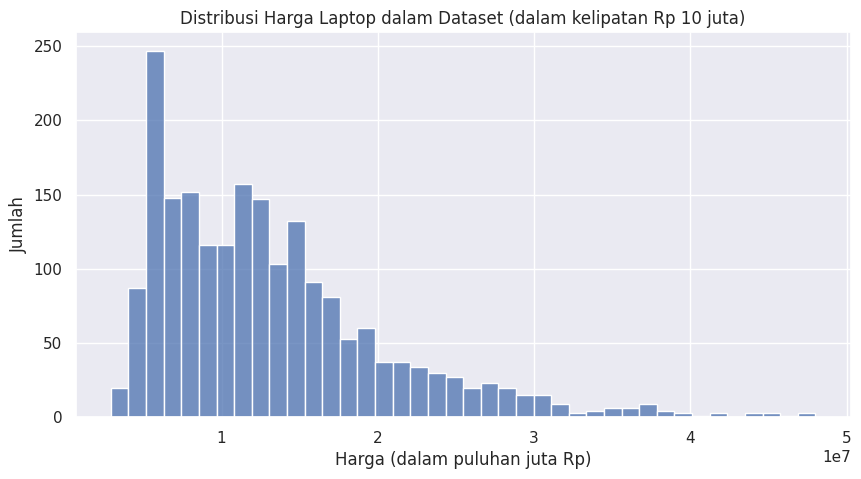

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(df["price_clean"], bins=40)
plt.title("Distribusi Harga Laptop dalam Dataset (dalam kelipatan Rp 10 juta)")
plt.xlabel("Harga (dalam puluhan juta Rp)")
plt.ylabel("Jumlah")
plt.show()


### RAM vs Harga (Scatter Plot)

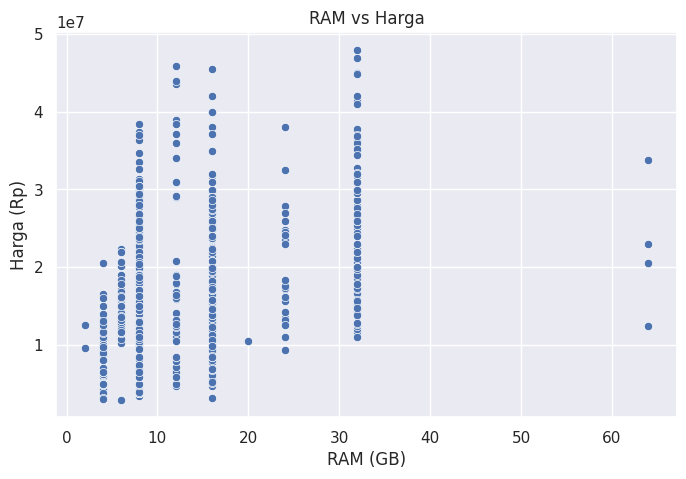

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="ram_gb", y="price_clean")
plt.title("RAM vs Harga")
plt.xlabel("RAM (GB)")
plt.ylabel("Harga (Rp)")
plt.show()

### Storage vs Harga (Scatter Plot)

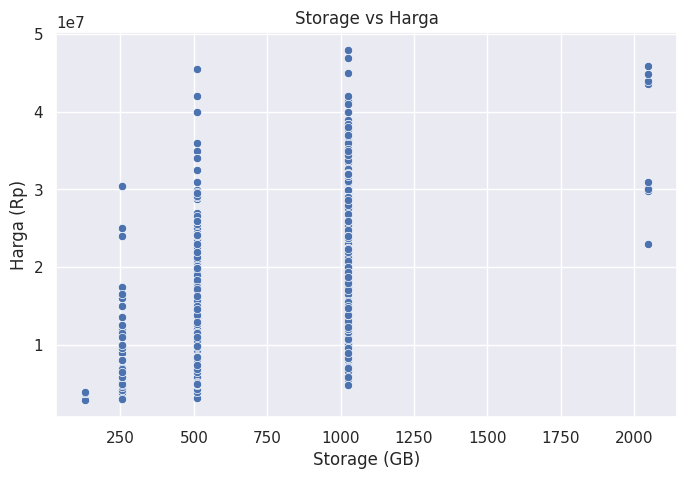

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="storage_gb", y="price_clean")
plt.title("Storage vs Harga")
plt.xlabel("Storage (GB)")
plt.ylabel("Harga (Rp)")
plt.show()

### CPU Brand vs Harga (Boxplot)

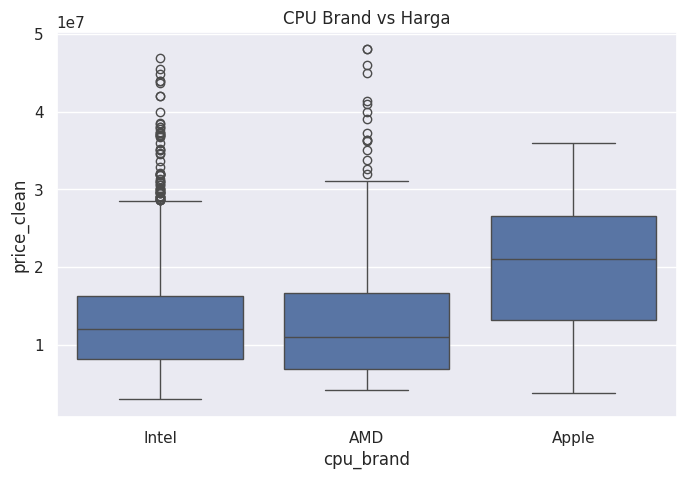

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="cpu_brand", y="price_clean")
plt.title("CPU Brand vs Harga")
plt.show()

### CPU Series vs Harga

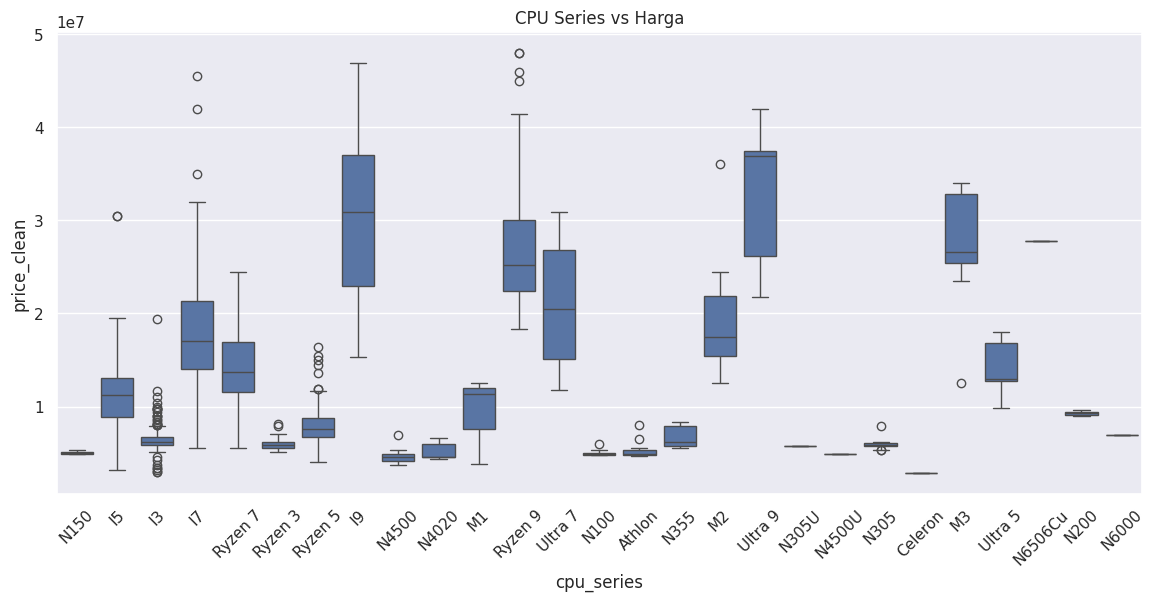

In [52]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="cpu_series", y="price_clean")
plt.xticks(rotation=45)
plt.title("CPU Series vs Harga")
plt.show()


### Korelasi antar Fitur

#### Ranking CPU Series berdasarkan Harga Rata-rata (Data-Driven)

In [ ]:
cpu_avg_price = df.groupby('cpu_series')['price_clean'].median()
df['cpu_avg_price'] = df['cpu_series'].map(cpu_avg_price)

# df['cpu_avg_price'] = df['cpu_series'].map(cpu_avg_price)
# df['cpu_avg_price'] = df['cpu_avg_price'].fillna(df['price_clean'].median())

global_median = df['price_clean'].median()
df['cpu_avg_price'] = df['cpu_avg_price'].fillna(global_median)

In [95]:
num_cols = ["price_clean", "ram_gb", "storage_gb", "cpu_avg_price", "discount_percentage"]
corr = df[num_cols].corr()
corr

,price_clean,ram_gb,storage_gb,cpu_avg_price,discount_percentage
price_clean,1.000000,0.434733,0.589694,0.723068,0.056120
ram_gb,0.434733,1.000000,0.461295,0.313310,-0.107342
storage_gb,0.589694,0.461295,1.000000,0.527640,-0.016150
cpu_avg_price,0.723068,0.313310,0.527640,1.000000,-0.020956
discount_percentage,0.056120,-0.107342,-0.016150,-0.020956,1.000000


### Heatmap

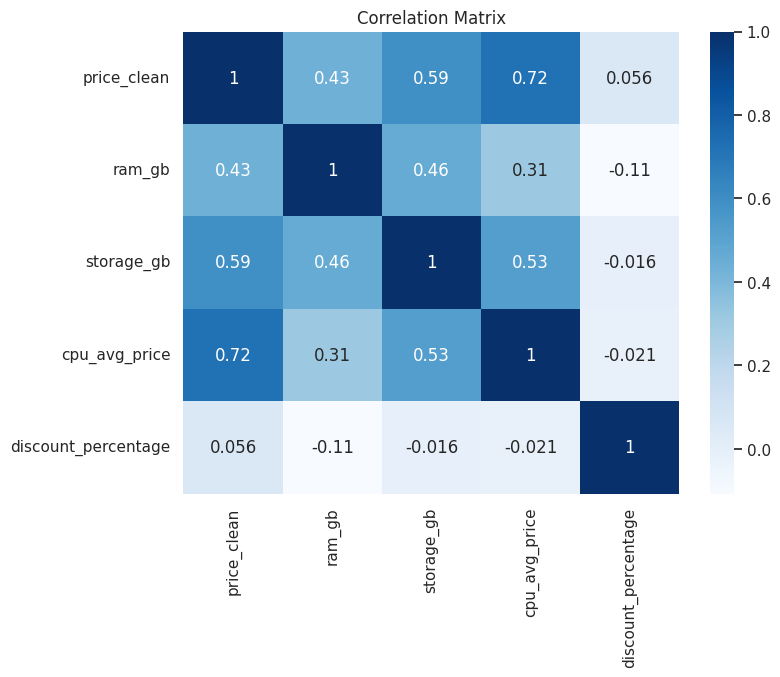

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()